In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.3 kB/s 
     |████████████████████████████████| 5.8 MB 51.4 MB/s 
     |████████████████████████████████| 1.6 MB 42.5 MB/s 
     |████████████████████████████████| 438 kB 67.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [5]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Embedding, Activation, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
from attention import Attention
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)
X_train = sequence.pad_sequences(X_train, maxlen = 500)
X_test = sequence.pad_sequences(X_test, maxlen = 500)

17473536/17464789 [==============================] - 0s 0us/step


In [8]:
#model 구조 설정
model = Sequential()
model.add(Embedding(5000,500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences = True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

#모델 실행 옵션
model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 3)

In [9]:
import tensorflow as tf
tf.test.is_gpu_available()

True

Epoch 1/100
625/625 [==============================] - 30s 34ms/step - loss: 0.3931 - accuracy: 0.8192 - val_loss: 0.2886 - val_accuracy: 0.8801
Epoch 2/100
625/625 [==============================] - 21s 33ms/step - loss: 0.2409 - accuracy: 0.9034 - val_loss: 0.2894 - val_accuracy: 0.8855
Epoch 3/100
625/625 [==============================] - 20s 32ms/step - loss: 0.1750 - accuracy: 0.9338 - val_loss: 0.3014 - val_accuracy: 0.8826
Epoch 4/100
782/782 [==============================] - 9s 10ms/step - loss: 0.3105 - accuracy: 0.8816

 Test Accuracy: 0.8816


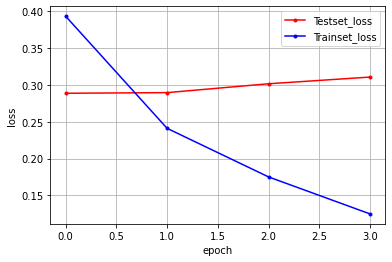

In [10]:
#모델 실행
history = model.fit(X_train, y_train, batch_size = 40, epochs = 100, validation_data = (X_test,y_test), callbacks = [early_stopping_callback])

#테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

#학습 데이터와 테스트셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()